In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Задача 1.

Поиграемся с датасетом про диабет (он совсем легкий).

In [ ]:
!wget https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/03-LinearClassification/Diabetes%20Binary%20Classification.csv

--2024-03-16 12:27:56--  https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/03-LinearClassification/Diabetes%20Binary%20Classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24353 (24K) [text/plain]
Saving to: ‘Diabetes Binary Classification.csv’

Diabetes Binary Cla 100%[===================>]  23.78K  --.-KB/s    in 0s      

2024-03-16 12:27:56 (73.7 MB/s) - ‘Diabetes Binary Classification.csv’ saved [24353/24353]



In [ ]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [ ]:
data.info() # всё хорошо

In [ ]:
X = data.drop(['Class variable (0 or 1)'], axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, stratify=y) # установила stratify из-за дисбаланса классов

In [ ]:
y.value_counts()

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

Обучаем логистическую регрессию и SVM:

In [ ]:
# логистическая регрессия

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test)) # такое себе из-за дисбаланса классов...

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       427
           1       0.57      0.77      0.65       149

    accuracy                           0.79       576
   macro avg       0.74      0.78      0.75       576
weighted avg       0.82      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       136
           1       0.57      0.68      0.62        56

    accuracy                           0.76       192
   macro avg       0.71      0.73      0.72       192
weighted avg       0.77      0.76      0.76       192



In [ ]:
#SVM

model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       420
           1       0.59      0.76      0.66       156

    accuracy                           0.79       576
   macro avg       0.74      0.78      0.75       576
weighted avg       0.81      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       134
           1       0.55      0.64      0.59        58

    accuracy                           0.73       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.75      0.73      0.74       192



Кажется, что логистическая регрессия будет получше.



In [ ]:
# применим масштабирование, всё соберём в пайплайн
# лог.регр.

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test)) # для класса 1 качество стало чуть-чуть получше

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       419
           1       0.59      0.76      0.66       157

    accuracy                           0.79       576
   macro avg       0.75      0.78      0.76       576
weighted avg       0.82      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       131
           1       0.60      0.66      0.62        61

    accuracy                           0.75       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.76      0.75      0.75       192



In [ ]:
# SVM

pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       418
           1       0.66      0.84      0.74       158

    accuracy                           0.84       576
   macro avg       0.80      0.84      0.81       576
weighted avg       0.86      0.84      0.84       576
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       134
           1       0.57      0.66      0.61        58

    accuracy                           0.74       192
   macro avg       0.70      0.72      0.71       192
weighted avg       0.76      0.74      0.75       192



Применим class_weight для обеих моделей:

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       344
           1       0.75      0.65      0.70       232

    accuracy                           0.77       576
   macro avg       0.77      0.75      0.76       576
weighted avg       0.77      0.77      0.77       576
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       112
           1       0.69      0.57      0.63        80

    accuracy                           0.71       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.71      0.71      0.71       192



In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(class_weight='balanced'))])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       323
           1       0.87      0.69      0.77       253

    accuracy                           0.82       576
   macro avg       0.83      0.81      0.81       576
weighted avg       0.83      0.82      0.82       576
               precision    recall  f1-score   support

           0       0.69      0.84      0.76       102
           1       0.76      0.57      0.65        90

    accuracy                           0.71       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.72      0.71      0.71       192



Качество получилось не суперским, но class_weight помог с дисбалансом классов! Регрессия и SVM почти идентичны (но регрессия где-то чуть лучше все равно)

## Задача 2.

Второй датасет - про покупателей велосипедов.

In [2]:
!wget https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/03-LinearClassification/bike_buyers_clean.csv

--2024-03-18 14:09:48--  https://raw.githubusercontent.com/yodiiin/mag2023/main/CL/term02/03-LinearClassification/bike_buyers_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86348 (84K) [text/plain]
Saving to: ‘bike_buyers_clean.csv’

bike_buyers_clean.c 100%[===================>]  84.32K  --.-KB/s    in 0.01s   

2024-03-18 14:09:48 (5.67 MB/s) - ‘bike_buyers_clean.csv’ saved [86348/86348]



In [65]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Пытаемся по характеристикам человека понять, купит он велик или нет.

In [66]:
data.drop(['ID'], axis=1, inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [ ]:
cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']

for col in cols:
 print(f'{col}: {len(data[col].unique())}\n\t{data[col].unique()}')

Marital Status: 2
	['Married' 'Single']
Gender: 2
	['Female' 'Male']
Education: 5
	['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation: 5
	['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner: 2
	['Yes' 'No']
Commute Distance: 5
	['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region: 3
	['Europe' 'Pacific' 'North America']


Обрабатываем колонки:

In [68]:
data['Marital Status'] = data['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)
data.Gender = data.Gender.apply(lambda x: 1 if x == 'Male' else 0)

In [69]:
def map_commute_dist(dist):
  dct = {'0-1 Miles': 1, '2-5 Miles': 3, '5-10 Miles': 4, '1-2 Miles': 2, '10+ Miles': 5}
  return dct[dist]

data['Commute Distance'] = data['Commute Distance'].apply(map_commute_dist)

In [70]:
def map_region(region):
  dct = {'Europe': 1, 'Pacific': 2, 'North America': 3}
  return dct[region]

data.Region = data.Region.apply(map_region)

In [71]:
data['Home Owner'] = data['Home Owner'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x: 1 if x == 'Yes' else 0)

In [72]:
data = pd.get_dummies(data, columns=['Education', 'Occupation'], drop_first=True)

In [26]:
data.sample(10)

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual
682,1,1,20000,3,0,2,1,3,52,0,0,0,0,1,0,0,0,0
954,1,1,60000,1,1,1,1,3,48,1,0,0,0,0,0,0,1,0
789,1,1,60000,2,0,2,2,3,48,1,0,1,0,0,0,0,1,0
299,1,0,30000,2,0,2,4,2,69,0,0,0,1,0,0,0,0,0
431,0,1,20000,0,1,0,1,2,28,1,0,0,1,0,0,1,0,0
670,1,1,70000,2,1,1,5,3,59,0,0,0,1,0,0,0,1,0
189,1,1,30000,1,1,1,1,1,44,1,0,0,1,0,0,0,0,0
283,1,0,70000,5,0,3,4,2,46,0,0,0,1,0,0,0,0,1
140,0,1,40000,0,0,0,1,1,40,1,0,0,0,0,0,0,1,0
578,1,1,60000,4,1,2,3,3,59,0,0,0,0,0,1,0,0,0


<Axes: >

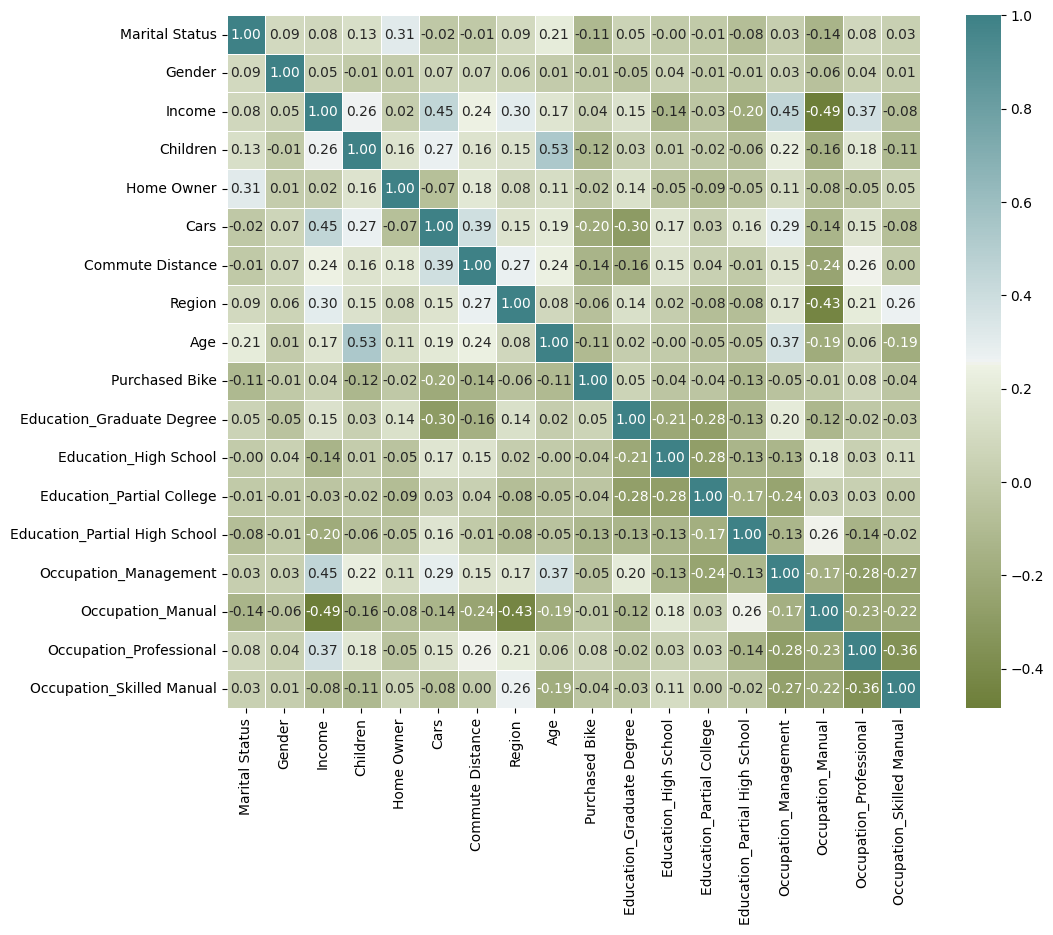

In [27]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

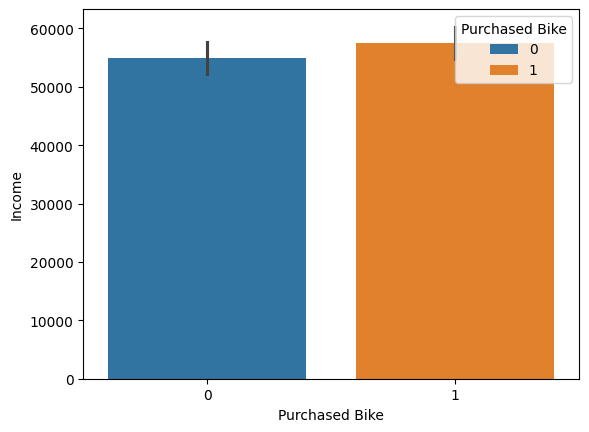

In [63]:
sns.barplot(x='Purchased Bike', y='Income', data=data, hue='Purchased Bike')
plt.show()

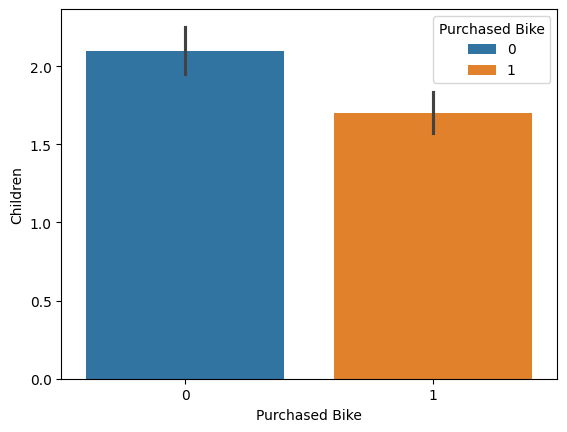

In [64]:
sns.barplot(x='Purchased Bike', y='Children', data=data, hue='Purchased Bike')
plt.show()

Обучим регрессию и SVM с этими признаками:

In [83]:
X = data.drop(['Purchased Bike'], axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [38]:
y.value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

In [80]:
# лог.регр.

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]) # применяем масштабирование
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       432
           1       0.61      0.64      0.62       368

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.64       800
weighted avg       0.65      0.64      0.64       800
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       113
           1       0.58      0.64      0.61        87

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200



In [81]:
# SVM

pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       411
           1       0.77      0.76      0.76       389

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       111
           1       0.62      0.67      0.65        89

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200



SVM получился лучше, чем регрессия. Я решила дропнуть Education и посмотреть, что получится...

In [82]:
del data['Education_Graduate Degree']
del data['Education_High School']
del data['Education_Partial College']
del data['Education_Partial High School']

<Axes: >

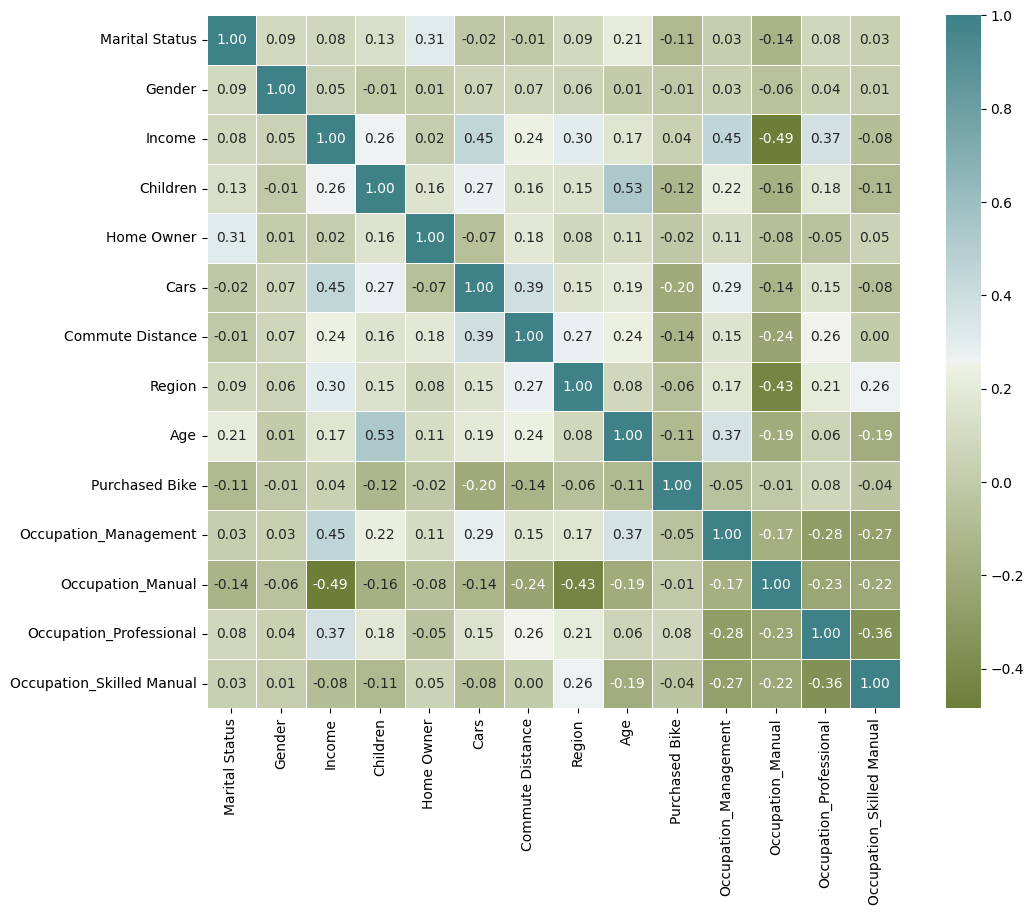

In [59]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [84]:
# лог.регр.

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test)) # для класса 1 стало чуть-чуть лучше

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       441
           1       0.59      0.64      0.62       359

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.64       800
weighted avg       0.65      0.64      0.64       800
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       111
           1       0.59      0.64      0.62        89

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200



In [85]:
# SVM

pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test)) # почти то же самое...

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       397
           1       0.79      0.75      0.77       403

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.77       800
weighted avg       0.78      0.78      0.77       800
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       113
           1       0.60      0.67      0.63        87

    accuracy                           0.67       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.67      0.67      0.67       200



С удалением признаков стало чуть хуже... В целом у SVM качество лучше, чем у регрессии